# ***C/NC DNA Detecting Code***

---



> This code to detect the coding and noncoding sequances (4-kmers) using chaos game representation, Chaos game representation (CGR) is an iterative mapping technique that assigns each nucleotide in a DNA sequence to a respective position on the plane in a one-to-one manner. 

In [24]:
%matplotlib inline
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import math
import pandas as pd
from pathlib import Path
import matplotlib.cm as cm
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
#Retrieve_the_data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
import time
start = time.time()

after start anything, AND and after get data from NCBI we must create two lists : 

---



1. inp_out_needed list : contains all data frame that, we will create in the next step that contain coding & noncoding of train & test cgr images.

2. paths list : that contain path of each data (coding & noncoding of train & test cgr images) on your google drive.


 

In [125]:
inp_out_needed=['data_coding_df1','data_noncoding_df1','data_coding_df1','data_noncoding_df1']
paths={'data_coding_df1':'/content/drive/My Drive/project/new_CGR_data/coding_seq','data_noncoding_df1':'/content/drive/My Drive/project/new_CGR_data/non_codingseq'}

In [ ]:
# df_image is a subfunction to create data frame from read each CGR image where each row is one image

In [126]:
def df_image(Images):
  Images1=sorted(Images) # sort them ascendingly 
  ImagF=np.zeros((len(Images),497664))  # All Images
  for i in range(len(Images1)):
      ImagF_1=imageio.imread(Images1[i])
      ImagF[i,:]=ImagF_1.reshape((1,497664))
  return pd.DataFrame(ImagF)

***Second*** : Assgin class to coding and noncoding images to can make classification

In [ ]:
# clas_assign is a subfunction to assign class 1 (one) to each coding cgr images data frame and class 0 (zero) to  noncoding cgr images data frame

In [127]:
def clas_assign(Images,c,b):
  c= df_image(Images)
  if b.split('_')[1] =='coding':
    c['y']=np.ones((len(c)))
  elif b.split('_')[1] =='noncoding':
    c['y']=np.zeros((len(c)))
  return c

In [ ]:
#A- For loop to make data frame from taking different types of images (coding & noncoding) from different folder (tain & test)  

In [128]:
for c in inp_out_needed:
  b=c
  home_path = os.getcwd()
  path=paths[c]
  os.chdir(path)
  Images=os.listdir()
  exec('{} = clas_assign(Images,c,b)'.format(c))

In [ ]:
# B- Merge codind & noncoding traing data (after assign class to each one ) in one train data frame and
# codind & noncoding testing data (after assign class to each one ) in one test data frame 

In [129]:
# merge coding sequence of train data to noncoding sequence of train data to obtain training sequence data frame
data_coding_noncoding1=pd.concat([data_coding_df1,data_noncoding_df1])

In [ ]:
# C - split train dataframe (from step B ) to X_train (data) & y_train (labeles) variables to can start machine learning classification

In [130]:
X=data_coding_noncoding1.iloc[:,:-1]
y=data_coding_noncoding1.iloc[:,-1]
X_train_after_pca, X_test_after_pca, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [131]:
# Reduce Dimension
from sklearn import decomposition
pca = decomposition.PCA(n_components=100, whiten=True)
pca.fit(X_train_after_pca)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [132]:
X_train = pca.transform(X_train_after_pca)
X_test = pca.transform(X_test_after_pca)

In [133]:
df_resultcol=['NaiveBayes','logistic regression','KNN','Perceptron','SVM','Ensemble']
df_resultrow=['Accuracy','Specificity','Precision','Sensitivity']

In [134]:
df_result_=pd.DataFrame(columns=df_resultcol,index=df_resultrow)
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN
Specificity,NaN,NaN,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN,NaN,NaN
Sensitivity,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# F- Statistical Data Analysis after Scalling:

Apply different type of classification :

1- Naive Bayes Classifier (supervised linear classifier)

2- Logistic regression (supervised linear classifier)

3- k-nearst neighbor classifier ( supervised nonlinear classifier)

4- perceptron (supervised linear classifier)

5- SVM (Support Vector Machine ) (supervised classifier)



In [ ]:
#1- Naive Bayes Classifier

In [135]:
# E- feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [136]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_n = GaussianNB()

# Train the model using the training sets
model_n.fit(X_train, y_train)

#Predict Output
y_pred_nai = model_n.predict(X_test) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [137]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_naiv=confusion_matrix(y_test,y_pred_nai)
cm_naiv

array([[32,  1],
       [ 3, 42]])

In [138]:
#Sensitivity_(True positive rate TPR) 
TP_nav= cm_naiv[0][0]
FN_nav= cm_naiv[1][0]
TPR_nav= TP_nav/(TP_nav+FN_nav) * 100
print("Sensitivity "+str(TPR_nav)+'%')

Sensitivity 91.42857142857143%


In [139]:
#Specificity(Total Negative Result TNR)
TN_nav= cm_naiv[1][1]
FP_nav= cm_naiv[0][1] 
TNR_nav = TN_nav/(TN_nav+FP_nav) * 100
print("Specificity "+str(TNR_nav)+'%')

Specificity 97.67441860465115%


In [140]:
percision_nav=(TP_nav/(TP_nav+FP_nav))*100
percision_nav

96.96969696969697

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

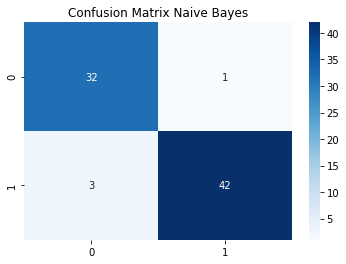

In [141]:
os.chdir(home_path)
cm_picture_nav=sn.heatmap(pd.DataFrame(cm_naiv),cmap="Blues", annot=True)
figure1 = cm_picture_nav.get_figure()   
plt.title("Confusion Matrix Naive Bayes")
figure1.savefig('/content/drive/My Drive/project/CGR_data/Confusion_NaiveBayes_4kmers.jpg', dpi=400)

In [142]:
#Calculate Accuracy and Print it
accu_navie=(sum([1 for i, j in zip(y_pred_nai, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_navie, "%")

Accuracy =  94.87179487179486 %


In [143]:
# calculating the cross validation for a set of predictions:
results_naiv = cross_val_score(model_n, X_train, y_train,cv=None)*100
results_naiv

array([95.23809524, 93.65079365, 82.25806452, 90.32258065, 85.48387097])

In [144]:
acc_cross_validation=pd.DataFrame()
acc_cross_validation['NaiveBayes']=results_naiv

In [145]:
df_result_['NaiveBayes']=pd.Series({'Accuracy':accu_navie,'Cross_Validation':results_naiv,'Confusion_Matrix':cm_naiv,'Sensitivity':TPR_nav,'Specificity':TNR_nav,'Precision':percision_nav})
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,NaN,NaN,NaN,NaN,NaN
Specificity,97.6744,NaN,NaN,NaN,NaN,NaN
Precision,96.9697,NaN,NaN,NaN,NaN,NaN
Sensitivity,91.4286,NaN,NaN,NaN,NaN,NaN


In [ ]:
#2- logistic regression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [147]:
clf =linear_model.LogisticRegression().fit(X_train, y_train)

In [148]:
y_pred_log1=clf.predict(X_test)

In [149]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_logistic=confusion_matrix(y_test,y_pred_log1)
cm_logistic

array([[32,  1],
       [ 1, 44]])

In [150]:
#Sensitivity_(True positive rate TPR) 
TP_log= cm_logistic[0][0]
FN_log= cm_logistic[1][0]
TPR_log= TP_log/(TP_log+FN_log) * 100
print("Sensitivity "+str(TPR_log)+'%')

Sensitivity 96.96969696969697%


In [151]:
#Specificity(Total Negative Result TNR)
TN_log= cm_logistic[1][1]
FP_log= cm_logistic[0][1] 
TNR_log = TN_log/(TN_log+FP_log) * 100
print("Specificity "+str(TNR_log)+'%')

Specificity 97.77777777777777%


In [152]:
percision_log=(TP_log/(TP_log+FP_log))*100
percision_log

96.96969696969697

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

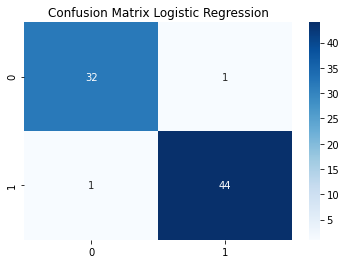

In [153]:
os.chdir(home_path)
cm_picture_logistic=sn.heatmap(pd.DataFrame(cm_logistic),cmap="Blues", annot=True)
figure2 = cm_picture_logistic.get_figure()   
plt.title("Confusion Matrix Logistic Regression")
figure2.savefig('/content/drive/My Drive/project/CGR_data/Confusion_Logistic_4kmers.jpg', dpi=400)

In [154]:
#Calculate Accuracy and Print it
accu_log=(sum([1 for i, j in zip(y_pred_log1, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_log, "%")

Accuracy =  97.43589743589743 %


In [155]:
# calculating the cross validation for a set of predictions:
results_log = cross_val_score(clf, X_train, y_train,cv=None )*100
results_log

array([100.        ,  98.41269841, 100.        ,  95.16129032,
        98.38709677])

In [156]:
acc_cross_validation['logistic regression']=results_log
acc_cross_validation

,NaiveBayes,logistic regression
0,95.238095,100.000000
1,93.650794,98.412698
2,82.258065,100.000000
3,90.322581,95.161290
4,85.483871,98.387097


In [157]:
df_result_['logistic regression']=pd.Series({'Accuracy': accu_log,'Cross_Validation':results_log,'Confusion_Matrix':cm_logistic,'Sensitivity':TPR_log,'Specificity':TNR_log,'Precision':percision_log})
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,97.4359,NaN,NaN,NaN,NaN
Specificity,97.6744,97.7778,NaN,NaN,NaN,NaN
Precision,96.9697,96.9697,NaN,NaN,NaN,NaN
Sensitivity,91.4286,96.9697,NaN,NaN,NaN,NaN


In [42]:
# 3- KNN:

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=25, metric= 'euclidean')
neigh.fit(X_train, y_train)

preds1 = neigh.predict(X_test)
preds1.shape


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

(78,)

In [159]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,preds1)
cm_knn

array([[33,  0],
       [45,  0]])

In [160]:
#Sensitivity_(True positive rate TPR) 
TP_knn= cm_knn[0][0]
FN_knn= cm_knn[1][0]
TPR_knn= TP_knn/(TP_knn+FN_knn) * 100
print("Sensitivity "+str(TPR_knn)+'%')

Sensitivity 42.30769230769231%


In [161]:
#Specificity(Total Negative Result TNR)
TN_knn= cm_knn[1][1]
FP_knn= cm_knn[0][1] 
TNR_knn = TN_knn/(TN_knn+FP_knn) * 100
print("Specificity "+str(TNR_knn)+'%')

Specificity nan%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


In [162]:
percision_knn=(TP_knn/(TP_knn+FP_knn))*100
percision_knn

100.0

Text(0.5, 1.0, 'Confusion Matrix KNN')

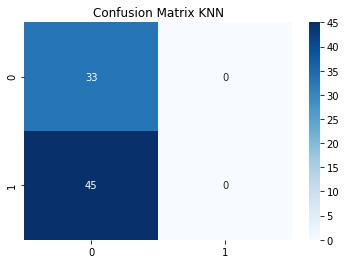

In [163]:
os.chdir(home_path)
cm_picture2=sn.heatmap(pd.DataFrame(cm_knn),cmap="Blues", annot=True)
figure3 = cm_picture2.get_figure()   
plt.title("Confusion Matrix KNN")
figure3.savefig('/content/drive/My Drive/project/CGR_data/Confusion_KNN_4kmers.jpg', dpi=400)

In [164]:
#Calculate Accuracy and Print it
accu_knn=(sum([1 for i, j in zip(preds1, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_knn, "%")

Accuracy =  42.30769230769231 %


In [165]:
# calculating the cross validation for a set of predictions:
results_knn= cross_val_score(neigh, X_train, y_train,cv=None )*100
results_knn

array([53.96825397, 53.96825397, 53.22580645, 53.22580645, 53.22580645])

In [166]:
acc_cross_validation['KNN']=results_knn
acc_cross_validation

,NaiveBayes,logistic regression,KNN
0,95.238095,100.000000,53.968254
1,93.650794,98.412698,53.968254
2,82.258065,100.000000,53.225806
3,90.322581,95.161290,53.225806
4,85.483871,98.387097,53.225806


In [167]:
df_result_['KNN']=pd.Series({'Accuracy':accu_knn,'Cross_Validation':results_knn,'Confusion_Matrix':cm_knn,'Sensitivity':TPR_knn,'Specificity':TNR_knn,'Precision':percision_knn})
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,97.4359,42.3077,NaN,NaN,NaN
Specificity,97.6744,97.7778,NaN,NaN,NaN,NaN
Precision,96.9697,96.9697,100,NaN,NaN,NaN
Sensitivity,91.4286,96.9697,42.3077,NaN,NaN,NaN


In [ ]:
# 4- Perceptron

In [168]:
from sklearn.linear_model import Perceptron
perp=Perceptron(max_iter=100, eta0=0.01,shuffle=True)
perp.fit(X_train, y_train)
Test_y=pd.Series(perp.predict(X_test), name='y')

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [169]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_per=confusion_matrix(y_test,Test_y)
cm_per

array([[31,  2],
       [ 2, 43]])

In [170]:
#Sensitivity_(True positive rate TPR) 
TP_per= cm_per[0][0]
FN_per= cm_per[1][0]
TPR_per= TP_per/(TP_per+FN_per) * 100
print("Sensitivity "+str(TPR_per)+'%')

Sensitivity 93.93939393939394%


In [171]:
#Specificity(Total Negative Result TNR)
TN_per= cm_per[1][1]
FP_per= cm_per[0][1] 
TNR_per = TN_per/(TN_per+FP_per) * 100
print("Specificity "+str(TNR_per)+'%')

Specificity 95.55555555555556%


In [172]:
percision_per=(TP_per/(TP_per+FP_per))*100
percision_per

93.93939393939394

Text(0.5, 1.0, 'Confusion Matrix Perceptron')

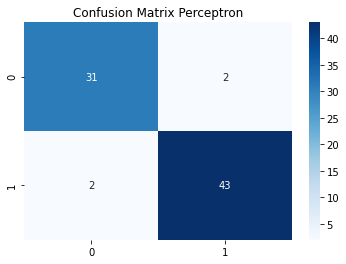

In [173]:
os.chdir(home_path)
cm_picture4=sn.heatmap(pd.DataFrame(cm_per),cmap="Blues", annot=True)
figure4 = cm_picture4.get_figure()   
plt.title("Confusion Matrix Perceptron")
figure4.savefig('/content/drive/My Drive/project/CGR_data/Confusion_Perceptron_4kmers.jpg', dpi=400)

In [174]:
#Calculate Accuracy and Print it
accu_per=(sum([1 for i, j in zip(Test_y, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_per, "%")
acc_per2=((TP_per+TN_per)/(TP_per+FP_per+FN_per+TN_per))*100 # another way
acc_per2

Accuracy =  94.87179487179486 %


94.87179487179486

In [175]:
# calculating the cross validation for a set of predictions:
results_per = cross_val_score(perp, X_train, y_train,cv=None)*100
results_per

array([93.65079365, 96.82539683, 91.93548387, 96.77419355, 95.16129032])

In [176]:
acc_cross_validation['Perceptron']=results_per
acc_cross_validation

,NaiveBayes,logistic regression,KNN,Perceptron
0,95.238095,100.000000,53.968254,93.650794
1,93.650794,98.412698,53.968254,96.825397
2,82.258065,100.000000,53.225806,91.935484
3,90.322581,95.161290,53.225806,96.774194
4,85.483871,98.387097,53.225806,95.161290


In [177]:
df_result_['Perceptron']=pd.Series({'Accuracy':accu_per,'Cross_Validation':results_per,'Confusion_Matrix':cm_per,'Sensitivity':TPR_per,'Specificity':TNR_per,'Precision':percision_per})
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,97.4359,42.3077,94.8718,NaN,NaN
Specificity,97.6744,97.7778,NaN,95.5556,NaN,NaN
Precision,96.9697,96.9697,100,93.9394,NaN,NaN
Sensitivity,91.4286,96.9697,42.3077,93.9394,NaN,NaN


In [ ]:
# 5- Support Vector Machine(SVM)

In [178]:
# Create Linear SVM object
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [179]:
# Train the model using the training sets and check score on test dataset
from sklearn.metrics import accuracy_score
support.fit(X_train, y_train)
predicted= support.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [180]:
score_svm1=support.score(X_test, y_test) # method 1 to calculate accuracy of svm model
score_svm2=accuracy_score(y_test,predicted)  # method 2 to calculate accuracy of svm model
#Calculate Accuracy and Print it by method3
accu_svm=(sum([1 for i, j in zip(predicted, y_test) if i == j])/len(y_test))*100
print("Your Model Accuracy is", score_svm1*100,score_svm2*100,accu_svm)

Your Model Accuracy is 96.15384615384616 96.15384615384616 96.15384615384616


In [181]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test,predicted)
cm_svm

array([[32,  1],
       [ 2, 43]])

In [182]:
#Sensitivity_(True positive rate TPR) 
TP_svm= cm_svm[0][0]
FN_svm= cm_svm[1][0]
TPR_svm= TP_svm/(TP_svm+FN_svm) * 100
print("Sensitivity "+str(TPR_svm)+'%')

Sensitivity 94.11764705882352%


In [183]:
#Specificity(Total Negative Result TNR)
TN_svm= cm_svm[1][1]
FP_svm= cm_svm[0][1] 
TNR_svm = TN_svm/(TN_svm+FP_svm) * 100
print("Specificity "+str(TNR_svm)+'%')

Specificity 97.72727272727273%


In [184]:
float32_epsilon = np.finfo(np.float32).eps
percision_svm_=(TP_svm/(TP_svm+FP_svm)+float32_epsilon)*100
percision_svm_

96.96970889062592

Text(0.5, 1.0, 'Confusion Matrix SVM')

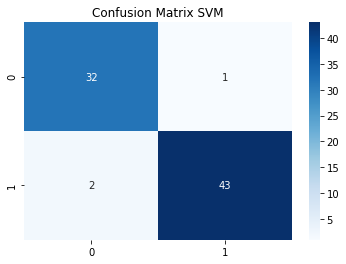

In [185]:
os.chdir(home_path)
cm_picture5=sn.heatmap(pd.DataFrame(cm_svm),cmap="Blues", annot=True)
figure5 = cm_picture5.get_figure()   
plt.title("Confusion Matrix SVM")
figure5.savefig('/content/drive/My Drive/project/CGR_data/Confusion_SVM_4kmers.jpg', dpi=400)

In [186]:
# calculating the mean R^2 for a set of predictions:
results_svm = cross_val_score(support,X_train, y_train,cv=None)*100
results_svm

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([ 96.82539683,  96.82539683, 100.        ,  96.77419355,
        95.16129032])

In [187]:
acc_cross_validation['SVM']=results_svm
acc_cross_validation

,NaiveBayes,logistic regression,KNN,Perceptron,SVM
0,95.238095,100.000000,53.968254,93.650794,96.825397
1,93.650794,98.412698,53.968254,96.825397,96.825397
2,82.258065,100.000000,53.225806,91.935484,100.000000
3,90.322581,95.161290,53.225806,96.774194,96.774194
4,85.483871,98.387097,53.225806,95.161290,95.161290


In [188]:
df_result_['SVM']=pd.Series({'Accuracy':accu_svm,'Cross_Validation':results_svm,'Confusion_Matrix':cm_svm,'Sensitivity':TPR_svm,'Specificity':TNR_svm,'Precision':percision_svm_})
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,97.4359,42.3077,94.8718,96.1538,NaN
Specificity,97.6744,97.7778,NaN,95.5556,97.7273,NaN
Precision,96.9697,96.9697,100,93.9394,96.9697,NaN
Sensitivity,91.4286,96.9697,42.3077,93.9394,94.1176,NaN


# Model Selection

In This study we try to select best model for coding/noncoding DNA detection by two methods:
1. from built in outsource function from (https://scipy-lectures.org/packages/scikit-learn/index.html)
2. aggergate above result from each model in new data frame called **df_result**

In [ ]:
# 1. outsourcing code

In [189]:
from sklearn import model_selection
from sklearn import metrics
for Model in [GaussianNB, LogisticRegression,KNeighborsClassifier,Perceptron,svm.LinearSVC]:
    clfsa = Model().fit(X_train, y_train)
    y_pred_model = clfsa.predict(X_test)
    print('%s: %s' % 
          (Model.__name__, metrics.f1_score(y_pred_model, y_test, average="macro"))) 

GaussianNB: 0.9478609625668449
LogisticRegression: 0.9737373737373738
KNeighborsClassifier: 0.8203947368421052
Perceptron: 0.9474747474747476
LinearSVC: 0.9607580077142379


In [ ]:
# 2. Create df_result to collect result on it:

In [190]:
df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,97.4359,42.3077,94.8718,96.1538,NaN
Specificity,97.6744,97.7778,NaN,95.5556,97.7273,NaN
Precision,96.9697,96.9697,100,93.9394,96.9697,NaN
Sensitivity,91.4286,96.9697,42.3077,93.9394,94.1176,NaN


## Merging the three best together(SVM,Logistic regression and Perceptron):

In [191]:
from sklearn.ensemble import VotingClassifier
combo = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('lr', linear_model.LogisticRegression()),
                            ('per', Perceptron())])

In [192]:
combo.fit(X_train, y_train)
y_pre_combo= combo.predict(X_test)

VotingClassifier(estimators=[('lsvc',
                              LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1...
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('pe

In [193]:
#Calculate Accuracy and Print it by method3
accu_combo=(sum([1 for i, j in zip(y_pre_combo, y_test) if i == j])/len(y_test))*100
print("Your Model Accuracy is", accu_combo)

Your Model Accuracy is 97.43589743589743


In [194]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_combo=confusion_matrix(y_test,y_pre_combo)
cm_combo

array([[32,  1],
       [ 1, 44]])

In [195]:
#Sensitivity_(True positive rate TPR) 
TP_combo= cm_combo[0][0]
FN_combo= cm_combo[1][0]
TPR_combo= TP_combo/(TP_combo+FN_combo) * 100
print("Sensitivity "+str(TPR_combo)+'%')

Sensitivity 96.96969696969697%


In [196]:
#Specificity(Total Negative Result TNR)
TN_combo= cm_combo[1][1]
FP_combo= cm_combo[0][1] 
TNR_combo = TN_combo/(TN_combo+FP_combo) * 100
print("Specificity "+str(TNR_combo)+'%')

Specificity 97.77777777777777%


In [197]:
percision_combo=(TP_combo/(TP_combo+FP_svm))*100
percision_combo

96.96969696969697

Text(0.5, 1.0, 'Confusion Matrix COMBO (SVM+Logistic+Perceptron)')

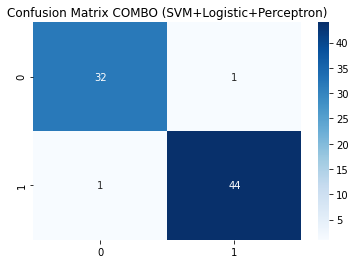

In [198]:
os.chdir(home_path)
cm_picture6=sn.heatmap(pd.DataFrame(cm_combo),cmap="Blues", annot=True)
figure6 = cm_picture6.get_figure()   
plt.title("Confusion Matrix COMBO (SVM+Logistic+Perceptron)")
figure6.savefig('/content/drive/My Drive/project/CGR_data/Confusion_combo.jpg', dpi=400)

In [199]:
# calculating the mean R^2 for a set of predictions:
results_combo = cross_val_score(combo, X_train, y_train,cv=None)*100
results_combo

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([100.        ,  98.41269841, 100.        ,  95.16129032,
       100.        ])

In [200]:
acc_cross_validation['Ensemble']=results_svm
acc_cross_validation

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
0,95.238095,100.000000,53.968254,93.650794,96.825397,96.825397
1,93.650794,98.412698,53.968254,96.825397,96.825397,96.825397
2,82.258065,100.000000,53.225806,91.935484,100.000000,100.000000
3,90.322581,95.161290,53.225806,96.774194,96.774194,96.774194
4,85.483871,98.387097,53.225806,95.161290,95.161290,95.161290


In [201]:
df_result_['Ensemble']=pd.Series({'Accuracy':accu_combo,'Cross_Validation':results_combo,'Confusion_Matrix':cm_combo,'Sensitivity':TPR_combo,'Specificity':TNR_combo,'Precision':percision_combo})

df_result_

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
Accuracy,94.8718,97.4359,42.3077,94.8718,96.1538,97.4359
Specificity,97.6744,97.7778,NaN,95.5556,97.7273,97.7778
Precision,96.9697,96.9697,100,93.9394,96.9697,96.9697
Sensitivity,91.4286,96.9697,42.3077,93.9394,94.1176,96.9697


,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Ensemble
first fold,95.238095,100.000000,53.968254,93.650794,96.825397,96.825397
second fold,93.650794,98.412698,53.968254,96.825397,96.825397,96.825397
third fold,82.258065,100.000000,53.225806,91.935484,100.000000,100.000000
fourth fold,90.322581,95.161290,53.225806,96.774194,96.774194,96.774194
fifth fold,85.483871,98.387097,53.225806,95.161290,95.161290,95.161290


Text(0.5, 1.0, 'Cross Validatio summary')

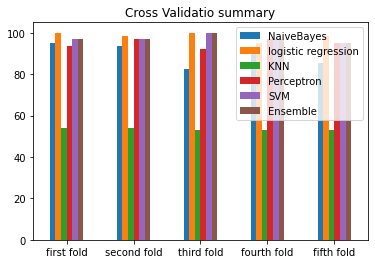

In [202]:
# bar plot of cross validation for each Models
index=['first fold', 'second fold', 'third fold', 'fourth fold', 'fifth fold']
df_cross=acc_cross_validation.copy()
df_cross.index=index
df_cross
#df_cross = pd.DataFrame({'NaiveBayes': Cross_Validation_nav,'logistic':Cross_Validation_log,'KNN': Cross_Validation_knn,'Perceptron':Cross_Validation_per,'SVM': Cross_Validation_svm,'Combination':Cross_Validation_combo}, index=index)
axx = df_cross.plot.bar(rot=0)
figure7 = axx.get_figure()   
plt.title("Cross Validatio summary")
figure7.savefig('/content/drive/My Drive/project/CGR_data/Cross_Validatio_summary.jpg', dpi=400)

Text(0.5, 0.98, 'Model Comparison')

{'boxes': [<matplotlib.lines.Line2D at 0x7f219e626470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f219e626dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f219e5b5898>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f219e5b5518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f219e6266d8>,
  <matplotlib.lines.Line2D at 0x7f219e56cdd8>]}

[Text(0, 0, 'NaiveBayes'),
 Text(0, 0, 'logistic regression'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'Perceptron'),
 Text(0, 0, 'SVM')]

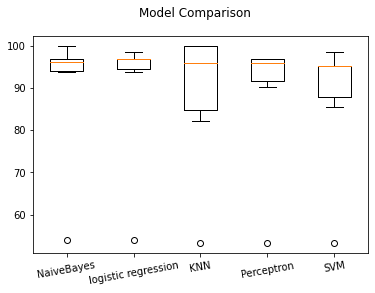

In [203]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_cross_validation)
ax.set_xticklabels(df_resultcol,rotation=10)
plt.show()
fig.savefig('/content/drive/My Drive/project/CGR_data/Model_Comparison.jpg', dpi=400)

Text(0.5, 1.0, 'Summary')

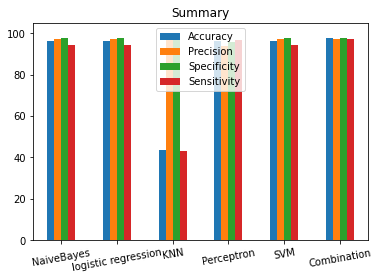

In [204]:
Accuracy=df_result.loc['Accuracy']
Sensitivity=df_result.loc['Sensitivity'] # Recall
Specificity=df_result.loc['Specificity']
Precision=df_result.loc['Precision']
index2=['NaiveBayes','logistic regression', 'KNN', 'Perceptron', 'SVM','Combination']
df2 = pd.DataFrame({'Accuracy': Accuracy,'Precision':Precision,'Specificity': Specificity,'Sensitivity': Sensitivity}, index=index2)
ax2 = df2.plot.bar(rot=10)
figure8 = ax2.get_figure()   
plt.title("Summary")
figure8.savefig('/content/drive/My Drive/project/CGR_data/Summary.jpg', dpi=400)

In [205]:
print('Duration: {} seconds'.format(time.time() - start))

Duration: 265.548885345459 seconds
